In [21]:
# !pip install tensorflow

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense

In [23]:
# !pip install glove_python

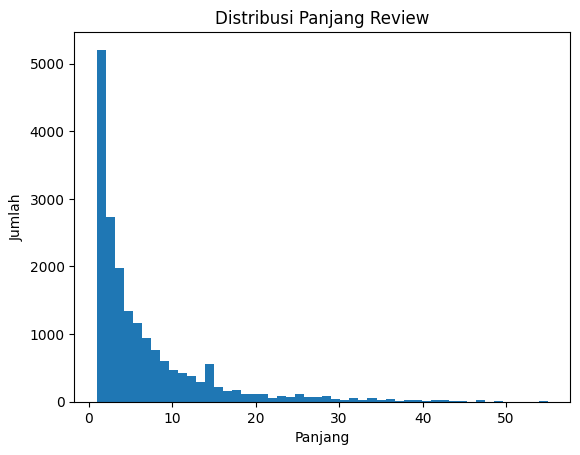

In [24]:
import matplotlib.pyplot as plt
review_lengths = [len(seq) for seq in sequences]
plt.hist(review_lengths, bins=50)
plt.title("Distribusi Panjang Review")
plt.xlabel("Panjang")
plt.ylabel("Jumlah")
plt.show()


In [25]:
df = pd.read_csv("dataset\dataset-shopee-final.csv")

texts = df["final_text"].astype(str).tolist()
labels = df["sentiment"].tolist()

In [26]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)

In [27]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=30, padding="post", truncating="post")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    padded, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [29]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=30),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), 
          epochs=10, batch_size=32, callbacks=[early_stop])


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9629 - loss: 0.1145 - val_accuracy: 0.9595 - val_loss: 0.1219
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9806 - loss: 0.0622 - val_accuracy: 0.9664 - val_loss: 0.1131
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9908 - loss: 0.0330 - val_accuracy: 0.9765 - val_loss: 0.0900
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9945 - loss: 0.0246 - val_accuracy: 0.9800 - val_loss: 0.1000
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9947 - loss: 0.0188 - val_accuracy: 0.9784 - val_loss: 0.1021
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9800 - val_loss: 0.1165


In [36]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Akurasi:", np.mean(y_pred_classes == y_test))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Akurasi: 0.9765333333333334

Classification Report:

              precision    recall  f1-score   support

     Negatif       0.98      0.99      0.99      1250
      Netral       0.98      0.95      0.97      1250
     Positif       0.97      0.99      0.98      1250

    accuracy                           0.98      3750
   macro avg       0.98      0.98      0.98      3750
weighted avg       0.98      0.98      0.98      3750



In [37]:
#save the model
import joblib
joblib.dump(model, 'lstm_model.pkl')

['lstm_model.pkl']

In [42]:
# Preprocess the input text
input_texts = [
    "aplikasi ini sangat jelek, tidak bisa digunakan",   # Negatif
    "fitur-fiturnya lengkap dan sangat membantu",        # Positif
    "aplikasinya biasa saja, tidak terlalu buruk",       # Netral
]

for text in input_texts:
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=30, padding="post", truncating="post")
    proba = model.predict(pad)
    pred_class = np.argmax(proba, axis=1)[0]
    pred_label = label_encoder.inverse_transform([pred_class])[0]
    print(f"Teks: '{text}' => Prediksi: {pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Teks: 'aplikasi ini sangat jelek, tidak bisa digunakan' => Prediksi: Negatif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Teks: 'fitur-fiturnya lengkap dan sangat membantu' => Prediksi: Negatif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Teks: 'aplikasinya biasa saja, tidak terlalu buruk' => Prediksi: Negatif
